<a href="https://colab.research.google.com/github/jovo999/ksa_univercity/blob/main/ksa_univercity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_universities_and_colleges_in_Saudi_Arabia')
df = tables[0]

In [ ]:
df

,0,1,2,3
0,University/College,Foundation,City,Website
1,Riyadh Region,Riyadh Region,Riyadh Region,Riyadh Region
2,King Saud University,1957,Riyadh,www.ksu.edu.sa
3,Princess Nora bint Abdul Rahman University,1970,Riyadh,www.pnu.edu.sa
4,Imam Muhammad bin Saud Islamic University,1974,Riyadh,www.imamu.edu.sa
...,...,...,...,...
89,Tabuk University,2006,Tabuk,www.ut.edu.sa
90,Fahd bin Sultan University,2003,Tabuk,www.fbsu.edu.sa
91,Multi Cities,Multi Cities,Multi Cities,Multi Cities
92,King Saud bin Abdulaziz University for Health ...,2005,"Riyadh, Jeddah, Al-Ahsa",http://www.ksau-hs.edu.sa/


In [ ]:
df.rename(columns={

    0:'University',
    1:'Foundation',
    2:'City',
    3:'Website'


    }, inplace=True)

In [ ]:
df = df.drop(index=[0,1])

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,University,Foundation,City,Website
0,King Saud University,1957,Riyadh,www.ksu.edu.sa
1,Princess Nora bint Abdul Rahman University,1970,Riyadh,www.pnu.edu.sa
2,Imam Muhammad bin Saud Islamic University,1974,Riyadh,www.imamu.edu.sa
3,Prince Sultan University,1999,Riyadh,www.psu.edu.sa
4,College of Telecom & Information,1985,Riyadh,www.cti.edu.sa
...,...,...,...,...
87,Tabuk University,2006,Tabuk,www.ut.edu.sa
88,Fahd bin Sultan University,2003,Tabuk,www.fbsu.edu.sa
89,Multi Cities,Multi Cities,Multi Cities,Multi Cities
90,King Saud bin Abdulaziz University for Health ...,2005,"Riyadh, Jeddah, Al-Ahsa",http://www.ksau-hs.edu.sa/


In [ ]:
df.isnull().sum() * 100 / len(df)

,0
University,0.000000
Foundation,10.869565
City,0.000000
Website,4.347826


In [ ]:
df = df[df['Foundation'].astype(str).str.match(r'^\d{4}$')]

In [ ]:
df['Foundation']

,Foundation
0,1957
1,1970
2,1974
3,1999
4,1985
...,...
83,2006
85,2007
87,2006
88,2003


In [ ]:
df.isnull().sum()

,0
University,0
Foundation,0
City,0
Website,2


In [ ]:
df['City'].unique()

array(['Riyadh', 'Al Kharj', 'Majmaah', 'Shaqra', 'Jeddah', 'Mecca',
       'Taif', 'Thuwal', 'King Abdullah Economic City', 'Medina', 'Yanbu',
       'Dammam', 'Al Ahsa', 'Jubail', 'Dhahran', 'Hafr Al-Batin', 'Qatif',
       'Hafr al-Batin', 'Khobar', 'Al-Kharj', 'Abha', 'Buraydah',
       'Al-Qassim', 'Sakakah', 'Jizan', "Ha'il", 'Al-Baha', 'Najran',
       'Arar', 'Tabuk', 'Riyadh, Jeddah, Al-Ahsa'], dtype=object)

In [ ]:
df.tail()

,University,Foundation,City,Website
83,Najran University,2006,Najran,www.nu.edu.sa
85,Northern Borders University,2007,Arar,www.nbu.edu.sa
87,Tabuk University,2006,Tabuk,www.ut.edu.sa
88,Fahd bin Sultan University,2003,Tabuk,www.fbsu.edu.sa
90,King Saud bin Abdulaziz University for Health ...,2005,"Riyadh, Jeddah, Al-Ahsa",http://www.ksau-hs.edu.sa/


In [ ]:
df.shape

(67, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 0 to 90
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  67 non-null     object
 1   Foundation  67 non-null     object
 2   City        67 non-null     object
 3   Website     65 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB


In [ ]:
df['Foundation'] = df['Foundation'].astype(int)

<ipython-input-16-16760f23280f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Foundation'] = df['Foundation'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 0 to 90
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  67 non-null     object
 1   Foundation  67 non-null     int64 
 2   City        67 non-null     object
 3   Website     65 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [ ]:
mean_years = df['Foundation'].mean()

df['Foundation'].fillna(round(mean_years) , inplace=True)

print(df['Foundation'])

0     1957
1     1970
2     1974
3     1999
4     1985
      ... 
83    2006
85    2007
87    2006
88    2003
90    2005
Name: Foundation, Length: 67, dtype: int64


<ipython-input-18-39ad2ef68390>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Foundation'].fillna(round(mean_years) , inplace=True)
<ipython-input-18-39ad2ef68390>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Foundation'].fillna(round(mean_years) , inplace=True)


In [ ]:
df

,University,Foundation,City,Website
0,King Saud University,1957,Riyadh,www.ksu.edu.sa
1,Princess Nora bint Abdul Rahman University,1970,Riyadh,www.pnu.edu.sa
2,Imam Muhammad bin Saud Islamic University,1974,Riyadh,www.imamu.edu.sa
3,Prince Sultan University,1999,Riyadh,www.psu.edu.sa
4,College of Telecom & Information,1985,Riyadh,www.cti.edu.sa
...,...,...,...,...
83,Najran University,2006,Najran,www.nu.edu.sa
85,Northern Borders University,2007,Arar,www.nbu.edu.sa
87,Tabuk University,2006,Tabuk,www.ut.edu.sa
88,Fahd bin Sultan University,2003,Tabuk,www.fbsu.edu.sa


In [ ]:
df.groupby('University')['Foundation'].sum().reset_index().sort_values(by='Foundation', ascending=False)

,University,Foundation
8,Arab Open University,6014
39,Prince Mugrin University,2017
38,Prince Mohammad bin Salman College of Business...,2016
31,Leadership Community College,2015
59,University of Hafr Albatin,2014
...,...,...
19,Imam Muhammad bin Saud Islamic University,1974
46,Princess Nora bint Abdul Rahman University,1970
25,King Abdulaziz University,1967
20,Islamic University of Medina,1961


In [ ]:
df = df[df['University'] != 'Arab Open University']

In [ ]:
new_University = df.groupby('University')['Foundation'].sum().reset_index().sort_values(by='Foundation', ascending=False)
new_University

,University,Foundation
37,Prince Mugrin University,2017
36,Prince Mohammad bin Salman College of Business...,2016
29,Leadership Community College,2015
57,University of Hafr Albatin,2014
60,University of Jeddah,2014
...,...,...
17,Imam Muhammad bin Saud Islamic University,1974
44,Princess Nora bint Abdul Rahman University,1970
23,King Abdulaziz University,1967
18,Islamic University of Medina,1961


In [ ]:
old_University = df.groupby('University')['Foundation'].sum().reset_index().sort_values(by='Foundation', ascending=True)
old_University

,University,Foundation
27,King Saud University,1957
18,Islamic University of Medina,1961
23,King Abdulaziz University,1967
44,Princess Nora bint Abdul Rahman University,1970
17,Imam Muhammad bin Saud Islamic University,1974
...,...,...
58,University of Hafr al-Batin,2014
57,University of Hafr Albatin,2014
29,Leadership Community College,2015
36,Prince Mohammad bin Salman College of Business...,2016


In [ ]:
city_University = df['City'].value_counts().reset_index()
city_University

,City,count
0,Riyadh,13
1,Jeddah,11
2,Medina,5
3,Jubail,3
4,Dammam,2
5,Yanbu,2
6,Abha,2
7,Tabuk,2
8,Mecca,1
9,Taif,1


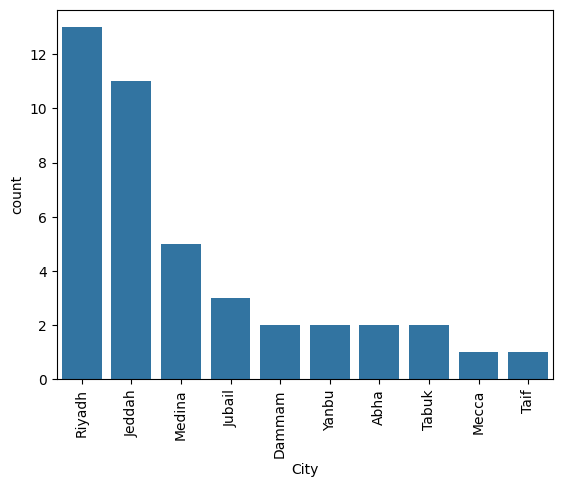

In [ ]:
sns.barplot(x='City', y='count', data=city_University.head(10))
plt.xticks(rotation=90)
plt.show()

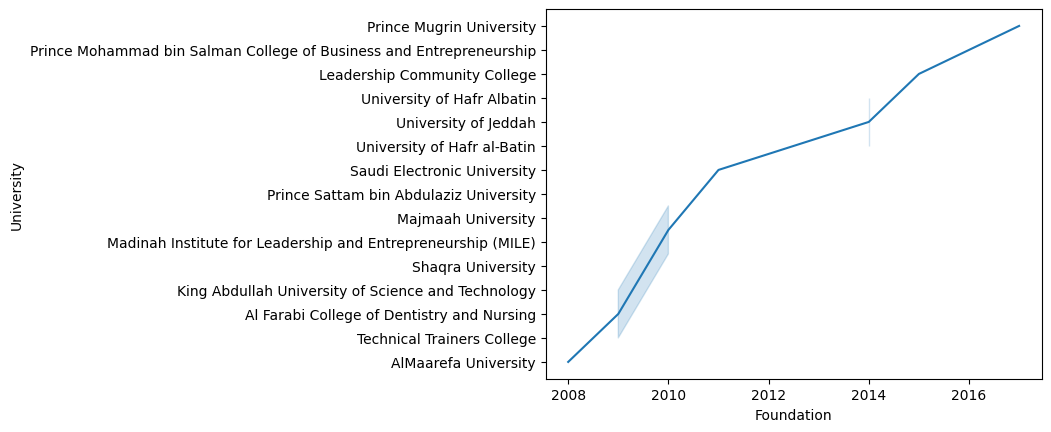

In [ ]:
sns.lineplot(x='Foundation', y='University', data=new_University.head(15))
plt.show()

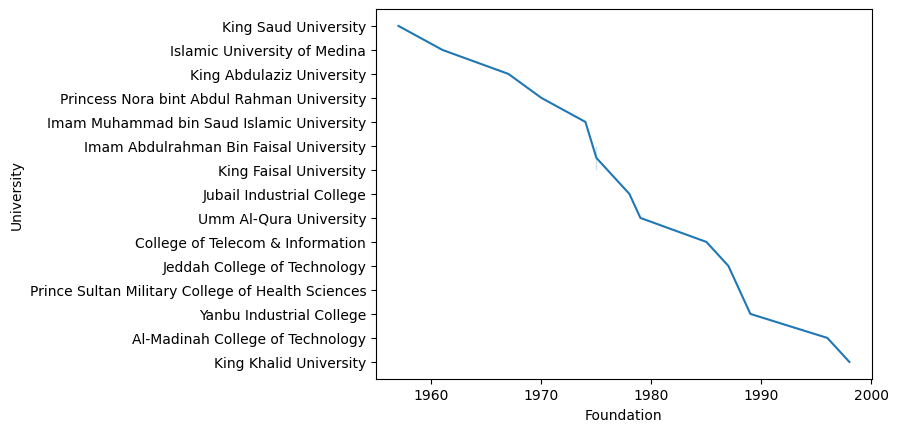

In [ ]:
sns.lineplot(x='Foundation', y='University', data=old_University.head(15))
plt.show()

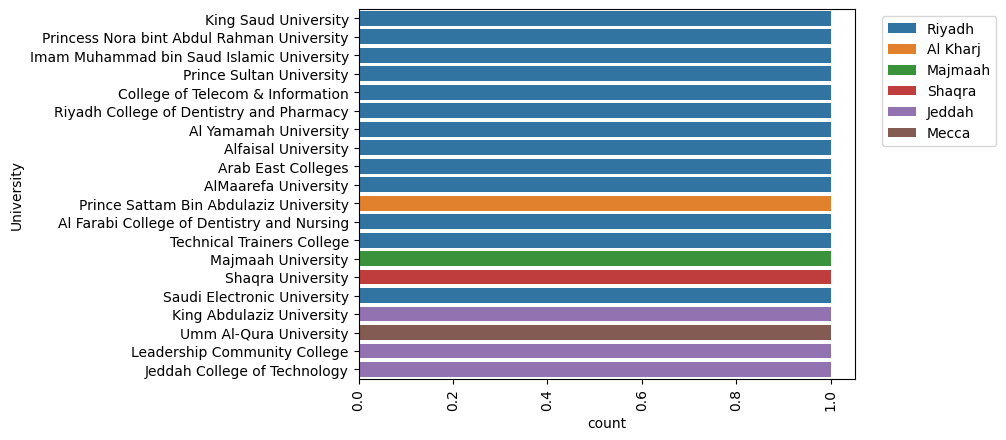

In [ ]:
sns.countplot(y='University', data=df.head(20) , hue='City')
plt.xticks(rotation=90)
plt.legend(loc='upper right' , bbox_to_anchor=(1.3, 1))
plt.show()

In [ ]:
df.to_csv('University.csv')